In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mathchi/online-retail-ii-data-set-from-ml-repository


!unzip online-retail-ii-data-set-from-ml-repository.zip


Saving archive (13).zip to archive (13).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository
License(s): DbCL-1.0
 82% 47.0M/57.5M [00:00<00:00, 168MB/s]
100% 57.5M/57.5M [00:00<00:00, 163MB/s]
Archive:  online-retail-ii-data-set-from-ml-repository.zip
  inflating: Year 2009-2010.csv      
  inflating: Year 2010-2011.csv      
  inflating: online_retail_II.xlsx   


# Information about dataset

*   The Online Retail II data set includes the sales of an online retail store based in the UK between 2009 and 2011. The product catalog of this company includes souvenirs. The vast majority of the company's customers are corporate customers.

*  # Variables

    InvoiceNo: Invoice number. A unique number for each transaction. If it starts with C which means cancelled operations.

    StockCode: Product code. A unique number for each product.

    Description: Product name.

    Quantity: It refers to how many of the products in the invoices have been sold.

    InvoiceDate: Invoice date.

    UnitPrice: Product price (pound)

    CustomerID: Unique customer number.

    Country: The name of the country where the customer lives.

#This is my first idea for this dataset..

  **I can analyze in which month a product was sold the most.Then Campaigns can be arranged based on profit-loss pricing appropriate for that month.
    If the NLP module is added to the machine learning structure, the analysis in the description section will enable the person to access similar products more easily through campaigns or advertisement**.




# What is my plan for this dataset
Firstly analyze variable ,and check is there any  null position , chech that all variable neccesary to add machine learning module? Which one is more suitable for this kind of problem..



## After little bit search I saw RFM is close to best solution.
What is the RFM ?

- **RFM analysis is a technique used to categorize customers according to their purchasing behaviour.**

 **How can apply ?**
- Recency: This is the date when the customer made the last purchase. It is - calculated by subtracting the customer's last shopping date from the analysis date.

- Frequency: This is the total number of purchases of the customer. In a different way, it gives the frequency of purchases made by the customer.

- Monetary: It is the total monetary value spent by the customer.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')

print(df.head())



  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


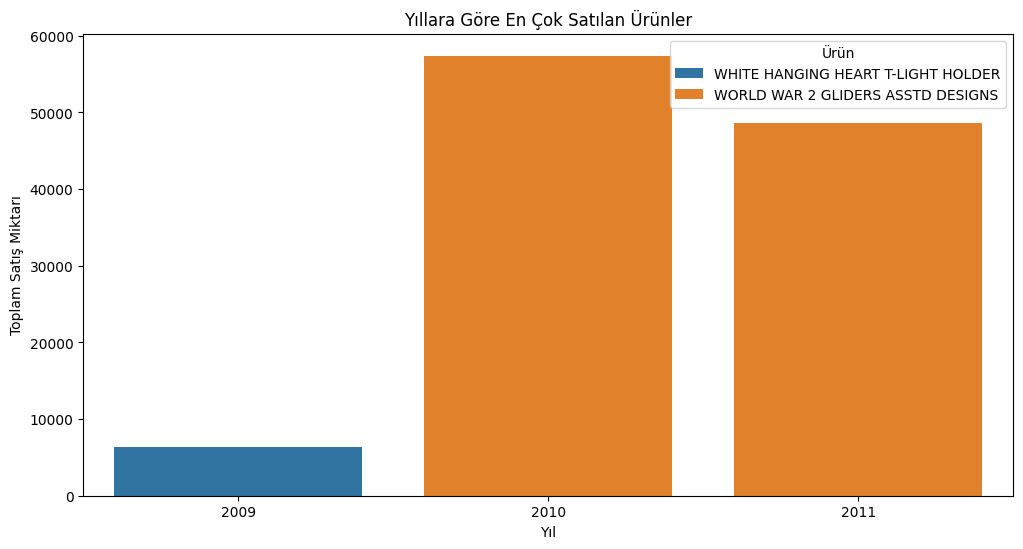

In [ ]:

df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

top_products = df.groupby(['Year', 'Description']).agg({'Quantity': 'sum'}).reset_index()
top_products = top_products.sort_values(['Year', 'Quantity'], ascending=[True, False]).groupby('Year').head(1)


plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Quantity', hue='Description', data=top_products, dodge=False)
plt.title('Yıllara Göre En Çok Satılan Ürünler')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış Miktarı')
plt.legend(title='Ürün', loc='upper right')
plt.show()


In [ ]:
import pandas as pd


df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')


df = pd.concat([df1, df2], axis=0)


In [ ]:

print(df.head())


print(df.info())


print(df.isnull().sum())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoic

In [ ]:
# Müşteri ID'si ve Ürün Açıklaması eksik olan satırları silelim
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Eksik verileri tekrar kontrol edelim
print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [ ]:
# InvoiceDate sütununu datetime formatına çevirelim
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# İptal edilmiş işlemleri kaldırma
df = df[~df['Invoice'].astype(str).str.startswith('C')]


In [ ]:
# TotalPrice sütununu hesaplayalım
df['TotalPrice'] = df['Quantity'] * df['Price']


In [ ]:
# Temizlenmiş verinin ilk birkaç satırını görüntüleyelim
print(df.head())

# Temizlenmiş verinin genel bilgilerini alalım
print(df.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0  
<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  

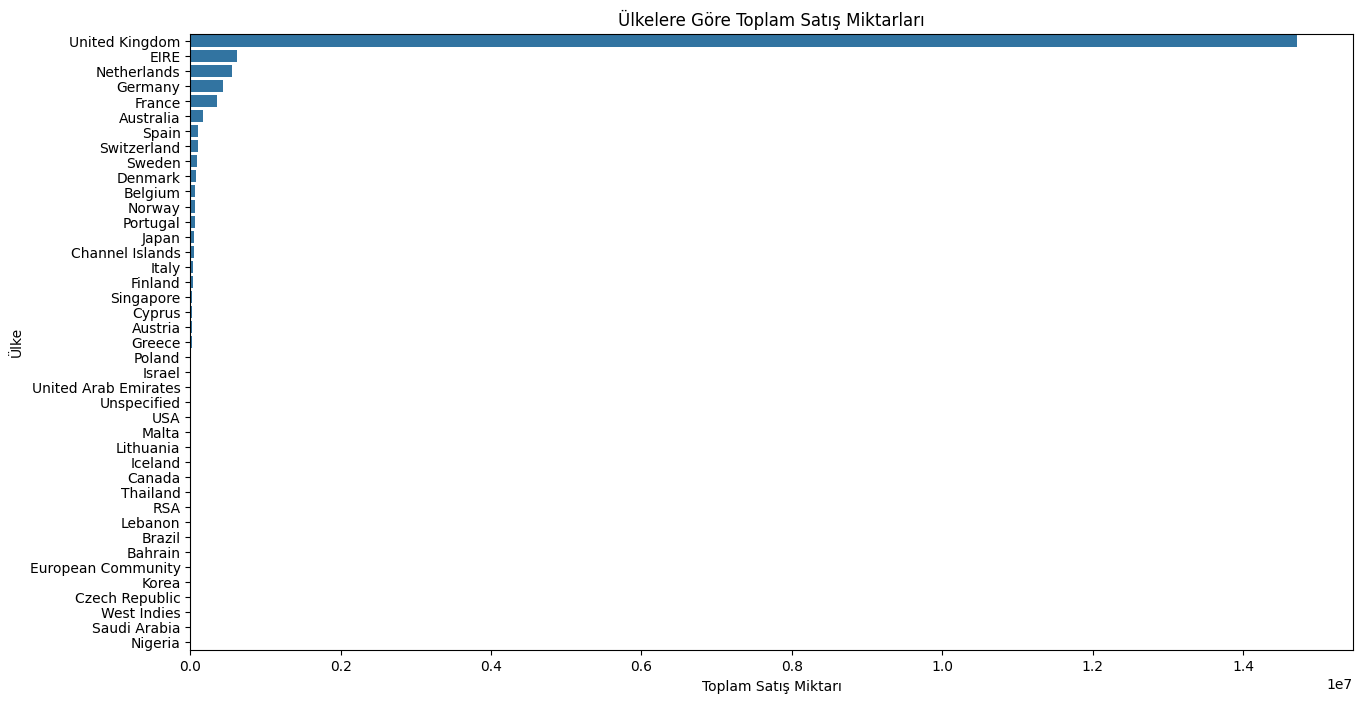

In [ ]:
#EN FAZLA HANGİ ÜLKE SATIŞ YAPMIŞ
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()


country_sales = country_sales.sort_values(by='TotalPrice', ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x='TotalPrice', y='Country', data=country_sales)
plt.title('Ülkelere Göre Toplam Satış Miktarları')
plt.xlabel('Toplam Satış Miktarı')
plt.ylabel('Ülke')
plt.show()

<ipython-input-58-99ad9aa23b20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Customer ID', data=customer_sales, palette='viridis')


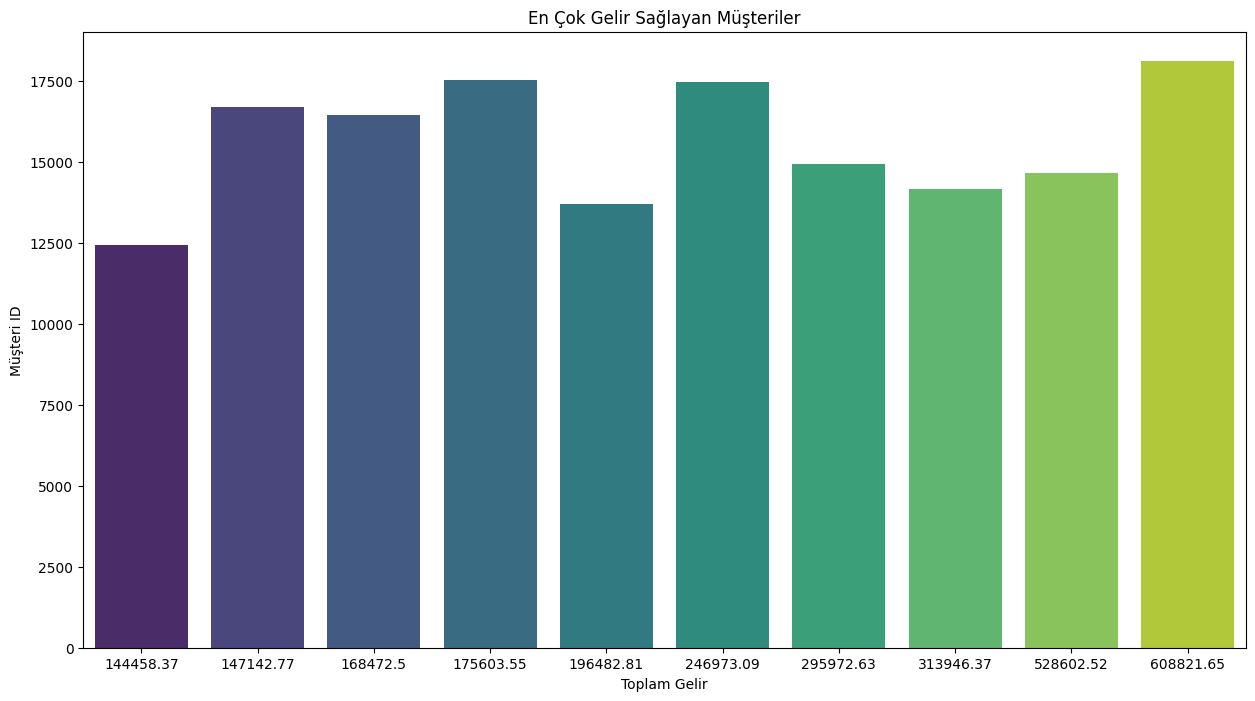

In [ ]:
# Müşterilere göre toplam satışları hesaplama
customer_sales = df.groupby('Customer ID')['TotalPrice'].sum().reset_index()


customer_sales = customer_sales.sort_values(by='TotalPrice', ascending=False).head(10)  # İlk 10 müşteriyi al


plt.figure(figsize=(15, 8))
sns.barplot(x='TotalPrice', y='Customer ID', data=customer_sales, palette='viridis')
plt.title('En Çok Gelir Sağlayan Müşteriler')
plt.xlabel('Toplam Gelir')
plt.ylabel('Müşteri ID')
plt.show()

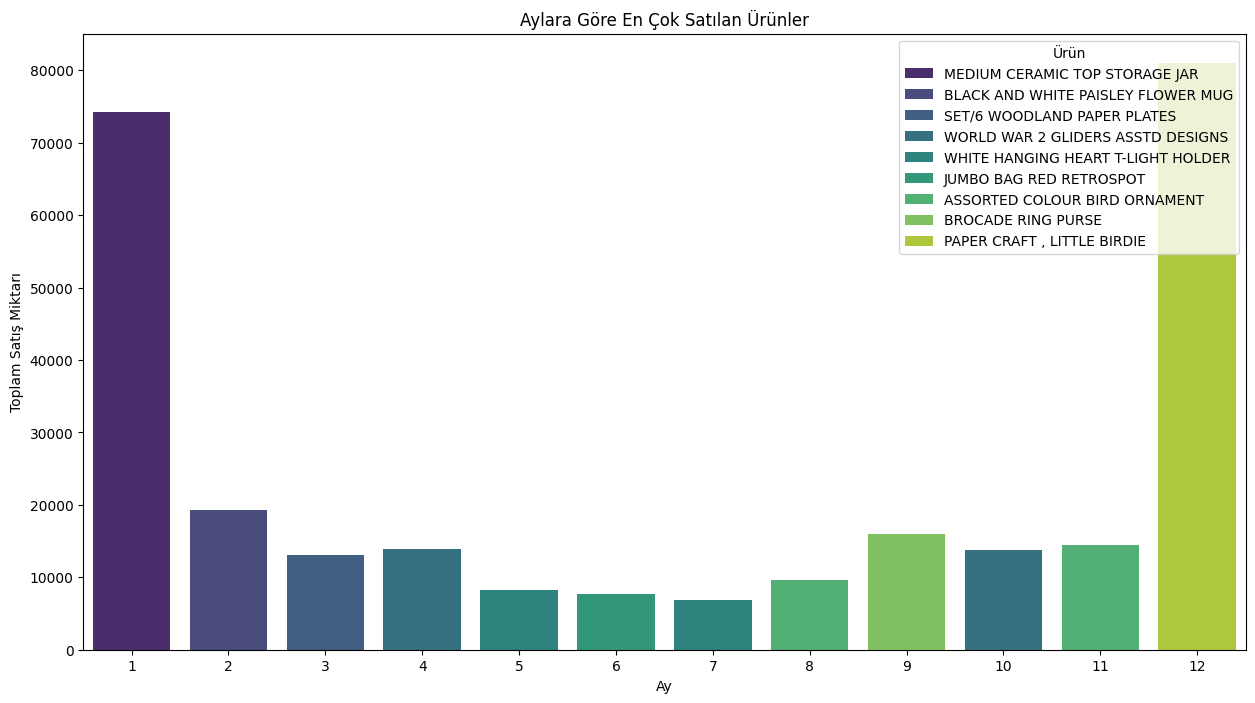

In [ ]:

df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

# Aylara göre en çok satılan ürünü bulma
top_products_monthly = df.groupby(['Month', 'Description']).agg({'Quantity': 'sum'}).reset_index()
top_products_monthly = top_products_monthly.sort_values(['Month', 'Quantity'], ascending=[True, False]).groupby('Month').head(1)

plt.figure(figsize=(15, 8))
sns.barplot(x='Month', y='Quantity', hue='Description', data=top_products_monthly, dodge=False, palette='viridis')
plt.title('Aylara Göre En Çok Satılan Ürünler')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış Miktarı')
plt.legend(title='Ürün', loc='upper right')
plt.show()

In [ ]:
import datetime as dt

# Analiz tarihi olarak veri setindeki son tarih sonrası bir gün belirleyelim
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [ ]:
# RFM metriklerini hesaplayalım
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

# Sütun isimlerini değiştirelim
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326         12  77556.46
1     12347.0        2          8   5633.32
2     12348.0       75          5   2019.40
3     12349.0       19          4   4428.69
4     12350.0      310          1    334.40


In [ ]:
# RFM skorlarını belirleyelim
rfm['R'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, ['4', '3', '2', '1'])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, ['4', '3', '2', '1'])

# RFM skorlarını birleştirelim
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score
0     12346.0      326         12  77556.46  3  1  1       311
1     12347.0        2          8   5633.32  1  1  1       111
2     12348.0       75          5   2019.40  2  2  2       222
3     12349.0       19          4   4428.69  1  2  1       121
4     12350.0      310          1    334.40  3  4  4       344


In [ ]:
# RFM skorlarını birleştirerek segmentleri oluşturalım
rfm['RFM_Segment'] = 'Low Value'
rfm.loc[rfm['RFM_Score'].astype(int) > 9, 'RFM_Segment'] = 'Mid Value'
rfm.loc[rfm['RFM_Score'].astype(int) > 12, 'RFM_Segment'] = 'High Value'

# Segmentlerin özelliklerini analiz edelim
segment_analysis = rfm.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()

print(segment_analysis)


  RFM_Segment     Recency  Frequency     Monetary  Count
0  High Value  201.457745   6.287196  3017.076888   5881



Pazarlama Stratejileri Geliştirme
Her segment için pazarlama stratejileri belirleyelim:

High Value: Bu müşteriler en değerli müşterilerdir. Bu müşterilere özel teklifler, sadakat programları ve kişiselleştirilmiş kampanyalar sunulabilir.
Mid Value: Bu müşteriler potansiyel olarak yüksek değerli müşteriler olabilir. Bu segmentteki müşterilere özel indirimler ve promosyonlar sunarak daha fazla alışveriş yapmaları teşvik edilebilir.
Low Value: Bu müşteriler düşük değerli müşterilerdir. Bu müşterilere genel kampanyalar sunulabilir ve sadakat programları ile alışveriş sıklıklarının artırılması hedeflenebilir.

Eksik müşteri kimliklerini temizleyin:
Müşteri kimliği olmayan satırlar, müşteri segmentasyonu ve satış tahmini için kullanılabilir veriler sağlamayacaktır. Bu nedenle, bu satırları kaldıracağız.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Skoru: 0.580476833362323


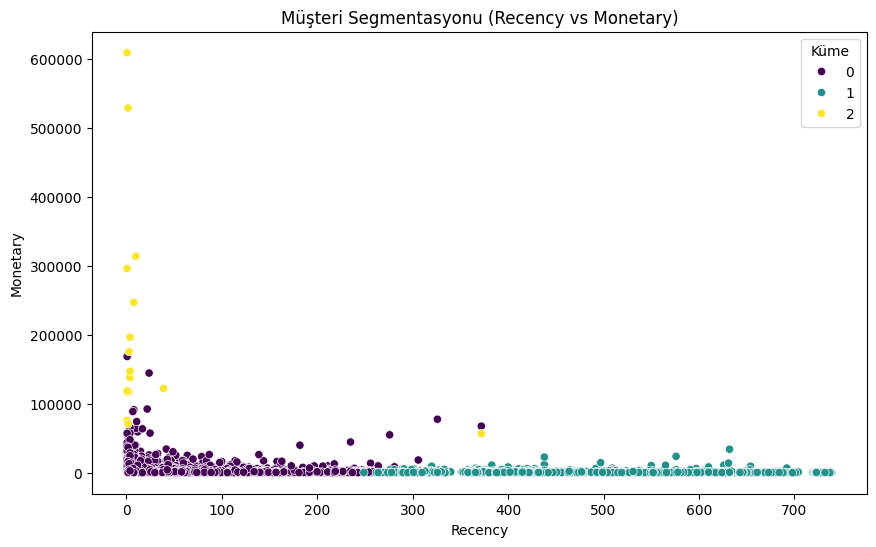

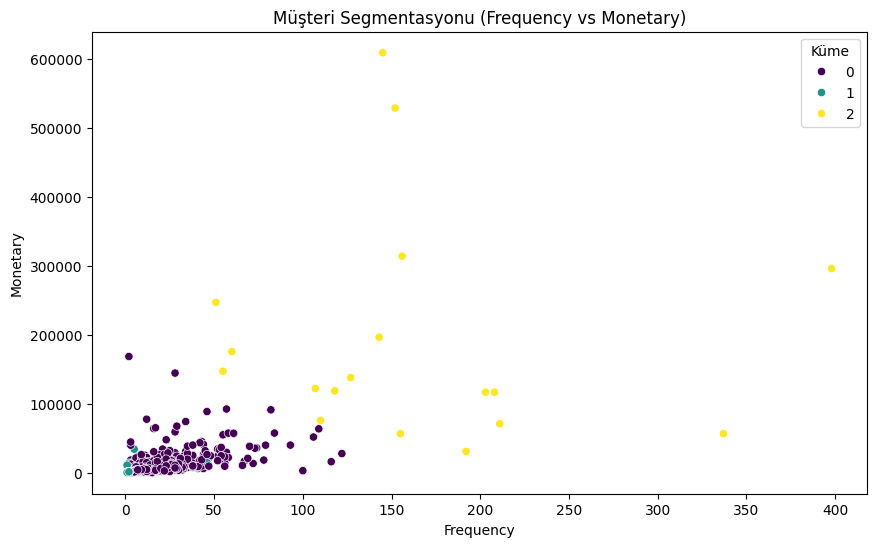

In [ ]:
# Veri ön işleme
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_


silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)
print(f'Silhouette Skoru: {silhouette_avg}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Müşteri Segmentasyonu (Recency vs Monetary)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Küme')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Müşteri Segmentasyonu (Frequency vs Monetary)')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Küme')
plt.show()

In [ ]:
# Yıl ve Ay bilgilerini ekleyelim
df['YearMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))



print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  Month  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4     12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0     12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0     12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8     12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0     12   

  YearMonth  
0   2009-12  
1   2009-12  
2   2009-12  
3   2009-12  
4   2009-12  


In [ ]:
#Rank the 5 most ordered products from most to least
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
WHITE HANGING HEART T-LIGHT HOLDER,93640
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79913
MEDIUM CERAMIC TOP STORAGE JAR,77916


In [ ]:
#Rank the 5 most ordered products from most to least
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=True).head(5)


,Quantity
Description,
VINTAGE METAL CAKE STAND CREAM,1
RED HEART CANDY POP LIGHTS,1
NEW BAROQUE WALL MIRROR,1
FOLDING SHIRT TIDY,1
GOLD CHRISTMAS STOCKING DECORATION,1


Question ? why there is - value ... is there any security problem or taking wrong notes? it Should control both side ..

In [ ]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,recency_score,frequency_score,monetary_score
0,12346.0,326,12,77556.46,0,2,5,5
1,12347.0,2,8,5633.32,0,5,4,5
2,12348.0,75,5,2019.40,0,3,4,4
3,12349.0,19,4,4428.69,0,5,3,5
4,12350.0,310,1,334.40,1,2,1,2


In [ ]:

rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,326,12,77556.46,0,2,5,5,25,cant_loose
1,12347.0,2,8,5633.32,0,5,4,5,54,champions
2,12348.0,75,5,2019.40,0,3,4,4,34,loyal_customers
3,12349.0,19,4,4428.69,0,5,3,5,53,potential_loyalists
4,12350.0,310,1,334.40,1,2,1,2,21,hibernating


In [ ]:
rfm[["segment", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
segment                                                                      
about_to_sleep        107.0   384  189       1.0   384    2    534.0   384   
at_Risk               373.0   753  733       4.0   753    8   1382.0   753   
cant_loose            331.0    71  576      16.0    71  155   8356.0    71   
champions               9.0   837   19      19.0   837  398  10901.0   837   
hibernating           460.0  1525  739       1.0  1525    2    437.0  1525   
loyal_customers        67.0  1161  189      10.0  1161  107   4212.0  1161   
need_attention        114.0   267  187       3.0   267    4   1281.0   267   
new_customers          11.0    55   19       1.0    55    1    354.0    55   
potential_loyalists    26.0   714   59       3.0   714    4   1156.0   714   
promising              39.0   114   59       1.0   114    1    319.0   114   

                               
                          max  
segment                        
about_to_sleep         5416.0  
at_Risk               44534.0  
cant_loose            77556.0  
champions            608822.0  
hibernating           13916.0  
loyal_customers      144458.0  
need_attention        39916.0  
new_customers          3861.0  
potential_loyalists  168472.0  
promising              1636.0